<a href="https://colab.research.google.com/github/TienNguyen93/drug-discovery/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Random Forest

## Install libraries

In [ ]:
# Install the ChEMBL web service package to retrieve bioactivity data from the ChEMBL Database
! pip install chembl_webresource_client

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 2.4 MB/s eta 0:00:00


### Import libraries

In [ ]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

## Search for target protein

### Target search for Acetylcholinesterase

In [ ]:
# target search
target = new_client.target
target_query = target.search('acetylcholinesterase')
targets = pd.DataFrame.from_dict(target_query)
targets.head()

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P22303', 'xref_name': None, 'xre...",Homo sapiens,Acetylcholinesterase,28.0,False,CHEMBL220,"[{'accession': 'P22303', 'component_descriptio...",SINGLE PROTEIN,9606
1,[],Homo sapiens,Cholinesterases; ACHE & BCHE,28.0,False,CHEMBL2095233,"[{'accession': 'P06276', 'component_descriptio...",SELECTIVITY GROUP,9606
2,[],Drosophila melanogaster,Acetylcholinesterase,18.0,False,CHEMBL2242744,"[{'accession': 'P07140', 'component_descriptio...",SINGLE PROTEIN,7227
3,[],Bemisia tabaci,AChE2,16.0,False,CHEMBL2366409,"[{'accession': 'B3SST5', 'component_descriptio...",SINGLE PROTEIN,7038
4,[],Leptinotarsa decemlineata,Acetylcholinesterase,16.0,False,CHEMBL2366490,"[{'accession': 'Q27677', 'component_descriptio...",SINGLE PROTEIN,7539


### Select and retrieve bioactivity data for Human Acetylcholinesterase (first entry)

In [ ]:
selected_target = targets.target_chembl_id[0]
selected_target

'CHEMBL220'

**Retrieve bioactivity data for targeted protein Human Acetylcholinesterase (CHEMBL220) that are reported as pChEMBL values**

In [ ]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [ ]:
df = pd.DataFrame.from_dict(res)

In [ ]:
df.head()

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,33969,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.75
1,None,None,37563,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.1
2,None,None,37565,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,50.0
3,None,None,38902,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.3
4,None,None,41170,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.8


In [ ]:
df.shape

(9091, 46)

There are **9091** datapoints and **46** columns in the **bioactivity data** for targeted protein

**Details of columns' names and types**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9091 entries, 0 to 9090
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   action_type                1315 non-null   object 
 1   activity_comment           1339 non-null   object 
 2   activity_id                9091 non-null   int64  
 3   activity_properties        9091 non-null   object 
 4   assay_chembl_id            9091 non-null   object 
 5   assay_description          9091 non-null   object 
 6   assay_type                 9091 non-null   object 
 7   assay_variant_accession    0 non-null      object 
 8   assay_variant_mutation     0 non-null      object 
 9   bao_endpoint               9091 non-null   object 
 10  bao_format                 9091 non-null   object 
 11  bao_label                  9091 non-null   object 
 12  canonical_smiles           9056 non-null   object 
 13  data_validity_comment      640 non-null    objec

### Handling missing data

**Drop any compounds has missing value for the standard_value and canonical_smiles**

In [ ]:
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2.head()

<ipython-input-10-3dab44705600>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[df.canonical_smiles.notna()]


,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,33969,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.75
1,None,None,37563,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.1
2,None,None,37565,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,50.0
3,None,None,38902,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.3
4,None,None,41170,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.8


In [ ]:
df2.shape

(7806, 46)

After droppping rows that contain missing values, the initial dataset (df) goes from **8832** to **7547** entries

**Get total of unique values in 'canonical_smiles' and drop any duplicate if they exist in that column**

In [ ]:
canon_nunique = df2['canonical_smiles'].nunique()
canon_nunique

6369

* There are **6157** unique values in 'canonical_smiles' but the dataset has **7547**, indicating there are duplicated SMILES strings.
* Hence, we drop the duplicates in df2 dataset.

In [ ]:
df2_nr = df2.drop_duplicates(['canonical_smiles'])
df2_nr.shape

(6369, 46)

In [ ]:
df2_nr.head()

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,33969,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.75
1,None,None,37563,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.1
2,None,None,37565,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,50.0
3,None,None,38902,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.3
4,None,None,41170,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.8


## Data pre-processing of the bioactivity data

### Combine the 3 columns `molecule_chembl_id`, `canonical_smiles`, `standard_value` to `bioactivity_class` to make a new dataset

In [ ]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_nr[selection]
df3.head()

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0


In [ ]:
df3.shape

(6369, 3)

### Labeling compounds as either being active, inactive or intermediate

In [ ]:
bioactivity_threshold = []
for i in df3.standard_value:
    if float(i) >= 10000:
        bioactivity_threshold.append("inactive")
    elif float(i) <= 1000:
        bioactivity_threshold.append("active")
    else:
        bioactivity_threshold.append("intermediate")

In [ ]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df4 = pd.concat([df3, bioactivity_class], axis=1)
df4.head()

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,active
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,active
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,inactive
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,active
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,active


In [ ]:
df4 = df4.dropna().reset_index(drop=True)

### Install conda and rdkit

In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2024-05-16 16:42:57--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.32.241, 104.16.191.158, 2606:4700::6810:20f1, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.32.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   225MB/s    in 0.4s    

2024-05-16 16:42:58 (225 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=p

### Drop SMILES strings to make new dataset

In [ ]:
df4.isna().sum()

molecule_chembl_id    0
canonical_smiles      0
standard_value        0
class                 0
dtype: int64

In [ ]:
df4.shape

(4163, 4)

In [ ]:
df_no_smiles = df4.drop(columns='canonical_smiles')

In [ ]:
df_no_smiles

,molecule_chembl_id,standard_value,class
0,CHEMBL133897,750.0,active
1,CHEMBL336398,100.0,active
2,CHEMBL131588,50000.0,inactive
3,CHEMBL130628,300.0,active
4,CHEMBL130478,800.0,active
...,...,...,...
4158,CHEMBL4077169,12300.0,active
4159,CHEMBL4065259,11800.0,intermediate
4160,CHEMBL4075825,18800.0,inactive
4161,CHEMBL4075624,16700.0,inactive


In [ ]:
smiles = []
test = 0

for i in df4.canonical_smiles.tolist():
  test += 1
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [ ]:
df_no_smiles.shape

(4163, 3)

In [ ]:
print(len(smiles))

4163


In [ ]:
df_clean_smiles = pd.concat([df_no_smiles, smiles], axis=1)
df_clean_smiles.head()

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL133897,750.0,active,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1
1,CHEMBL336398,100.0,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1
2,CHEMBL131588,50000.0,inactive,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1
3,CHEMBL130628,300.0,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F
4,CHEMBL130478,800.0,active,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C


In [ ]:
df_clean_smiles.shape

(4163, 4)

### Calculate Lipinski descriptors
* Lipinski is used to evaluate the druglikeness of compounds
* Lipinski's Rule stated the following:
    * Molecular weight < 500 Dalton
    * Octanol-water partition coefficient (LogP) < 5
    * Hydrogen bond donors < 5
    * Hydrogen bond acceptors < 10

### Import libraries

In [ ]:
%pip install rdkit

     |████████████████████████████████| 29.5 MB 74.9 MB/s 


In [ ]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### Calculate descriptors

In [ ]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata = []
    for elem in smiles:
      mol = Chem.MolFromSmiles(elem)
      if mol is not None:
        moldata.append(mol)

    baseData = np.arange(1,1)
    i = 0

    for mol in moldata:
      desc_MolWt = Descriptors.MolWt(mol)
      desc_MolLogP = Descriptors.MolLogP(mol)
      desc_NumHDonors = Lipinski.NumHDonors(mol)
      desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

      row = np.array(
          [desc_MolWt,
           desc_MolLogP,
           desc_NumHDonors,
           desc_NumHAcceptors
           ]
      )

      if (i == 0):
        baseData = row
      else:
        baseData = np.vstack([baseData, row])
      i += 1

    columnNames = ["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [ ]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski.head()

,MW,LogP,NumHDonors,NumHAcceptors
0,312.325,2.8032,0.0,6.0
1,376.913,4.5546,0.0,5.0
2,426.851,5.3574,0.0,5.0
3,404.845,4.7069,0.0,5.0
4,346.334,3.0953,0.0,6.0


In [ ]:
df_lipinski.shape

(4163, 4)

### Combine DataFrames

### View dataframes

In [ ]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,312.325,2.8032,0.0,6.0
1,376.913,4.5546,0.0,5.0
2,426.851,5.3574,0.0,5.0
3,404.845,4.7069,0.0,5.0
4,346.334,3.0953,0.0,6.0
...,...,...,...,...
4158,280.371,3.1895,0.0,3.0
4159,296.439,3.9061,0.0,3.0
4160,262.316,2.9971,0.0,4.0
4161,307.313,2.9053,0.0,6.0


In [ ]:
df4

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,active
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,active
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,inactive
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,active
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,active
...,...,...,...,...
4158,CHEMBL4077169,CN1c2ccccc2C(N2CCOCC2)c2ccccc21,12300.0,active
4159,CHEMBL4065259,CN1c2ccccc2C(N2CCSCC2)c2ccccc21,11800.0,intermediate
4160,CHEMBL4075825,CN1c2ccccc2C(n2cncn2)c2ccccc21,18800.0,inactive
4161,CHEMBL4075624,CN1c2ccccc2C(n2cnc([N+](=O)[O-])n2)c2ccccc21,16700.0,inactive


Now, let's combine the 2 DataFrame

In [ ]:
df_combined = pd.concat([df4,df_lipinski], axis=1)

In [ ]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,active,312.325,2.8032,0.0,6.0
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,active,376.913,4.5546,0.0,5.0
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,inactive,426.851,5.3574,0.0,5.0
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,active,404.845,4.7069,0.0,5.0
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,active,346.334,3.0953,0.0,6.0
...,...,...,...,...,...,...,...,...
4158,CHEMBL4077169,CN1c2ccccc2C(N2CCOCC2)c2ccccc21,12300.0,active,280.371,3.1895,0.0,3.0
4159,CHEMBL4065259,CN1c2ccccc2C(N2CCSCC2)c2ccccc21,11800.0,intermediate,296.439,3.9061,0.0,3.0
4160,CHEMBL4075825,CN1c2ccccc2C(n2cncn2)c2ccccc21,18800.0,inactive,262.316,2.9971,0.0,4.0
4161,CHEMBL4075624,CN1c2ccccc2C(n2cnc([N+](=O)[O-])n2)c2ccccc21,16700.0,inactive,307.313,2.9053,0.0,6.0


### EDA via Lipinski (should i need this?)
*  find which one falls into the listed conditions
* Lipinski's Rule stated the following:
    * Molecular weight < 500 Dalton
    * Octanol-water partition coefficient (LogP) < 5
    * Hydrogen bond donors < 5
    * Hydrogen bond acceptors < 10
* pIC50 > 6 = Actives and pIC50 < 5 = Inactives (mental note)

### Convert IC50 to pIC50
To allow IC50 data to be more uniformly distributed, we will convert IC50 to the negative logarithmic scale which is essentially -log10(IC50).

This custom function pIC50() will accept a DataFrame as input and will:

* Take the IC50 values from the standard_value column and converts it from nM to M by multiplying the value by 10^-9
* Take the molar value and apply -log10
* Delete the standard_value column and create a new pIC50 column

In [ ]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1)

    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [ ]:
df_combined['standard_value'] = df_combined['standard_value'].astype(float)

In [ ]:
df_combined.standard_value.describe()

count    4.163000e+03
mean     1.246980e+05
std      1.088561e+06
min      6.000000e-03
25%      1.200000e+02
50%      2.150000e+03
75%      1.803000e+04
max      4.960000e+07
Name: standard_value, dtype: float64

In [ ]:
-np.log10( (10**-9)* 100000000 )

1.0

In [ ]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [ ]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis=1)

    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [ ]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.8032,0.0,6.0,750.0
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.5546,0.0,5.0,100.0
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.3574,0.0,5.0,50000.0
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.7069,0.0,5.0,300.0
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.0953,0.0,6.0,800.0
...,...,...,...,...,...,...,...,...
4158,CHEMBL4077169,CN1c2ccccc2C(N2CCOCC2)c2ccccc21,active,280.371,3.1895,0.0,3.0,12300.0
4159,CHEMBL4065259,CN1c2ccccc2C(N2CCSCC2)c2ccccc21,intermediate,296.439,3.9061,0.0,3.0,11800.0
4160,CHEMBL4075825,CN1c2ccccc2C(n2cncn2)c2ccccc21,inactive,262.316,2.9971,0.0,4.0,18800.0
4161,CHEMBL4075624,CN1c2ccccc2C(n2cnc([N+](=O)[O-])n2)c2ccccc21,inactive,307.313,2.9053,0.0,6.0,16700.0


In [ ]:
df_norm.standard_value_norm.describe()

count    4.163000e+03
mean     1.246980e+05
std      1.088561e+06
min      6.000000e-03
25%      1.200000e+02
50%      2.150000e+03
75%      1.803000e+04
max      4.960000e+07
Name: standard_value_norm, dtype: float64

In [ ]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.8032,0.0,6.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.5546,0.0,5.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.3574,0.0,5.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.7069,0.0,5.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.0953,0.0,6.0,6.096910
...,...,...,...,...,...,...,...,...
4158,CHEMBL4077169,CN1c2ccccc2C(N2CCOCC2)c2ccccc21,active,280.371,3.1895,0.0,3.0,4.910095
4159,CHEMBL4065259,CN1c2ccccc2C(N2CCSCC2)c2ccccc21,intermediate,296.439,3.9061,0.0,3.0,4.928118
4160,CHEMBL4075825,CN1c2ccccc2C(n2cncn2)c2ccccc21,inactive,262.316,2.9971,0.0,4.0,4.725842
4161,CHEMBL4075624,CN1c2ccccc2C(n2cnc([N+](=O)[O-])n2)c2ccccc21,inactive,307.313,2.9053,0.0,6.0,4.777284


In [ ]:
df_final.pIC50.describe()

count    4163.000000
mean        5.825960
std         1.540972
min         1.304518
25%         4.744005
50%         5.667562
75%         6.920819
max        11.221849
Name: pIC50, dtype: float64

### Removing the 'intermediate' bioactivity class
Here, we will be removing the intermediate class from our data set.

In [ ]:
df_2class = df_final[df_final['class'] != 'intermediate'].reset_index()
df_2class

,index,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.8032,0.0,6.0,6.124939
1,1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.5546,0.0,5.0,7.000000
2,2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.3574,0.0,5.0,4.301030
3,3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.7069,0.0,5.0,6.522879
4,4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.0953,0.0,6.0,6.096910
...,...,...,...,...,...,...,...,...,...
3119,4157,CHEMBL4070092,C[n+]1c2ccccc2c(-c2cccs2)c2ccccc21.F[B-](F)(F)F,active,276.384,4.5460,0.0,1.0,4.388277
3120,4158,CHEMBL4077169,CN1c2ccccc2C(N2CCOCC2)c2ccccc21,active,280.371,3.1895,0.0,3.0,4.910095
3121,4160,CHEMBL4075825,CN1c2ccccc2C(n2cncn2)c2ccccc21,inactive,262.316,2.9971,0.0,4.0,4.725842
3122,4161,CHEMBL4075624,CN1c2ccccc2C(n2cnc([N+](=O)[O-])n2)c2ccccc21,inactive,307.313,2.9053,0.0,6.0,4.777284


### Get distribution for active and inactive class

In [ ]:
df_2class["class"].value_counts()

class
active      1725
inactive    1399
Name: count, dtype: int64

### Extract SMILES string, keep active class and put them in CSV

In [ ]:
# only take active class
# df_rnn = df_rnn[df_rnn['class'] != 'inactive']
test = df_2class[df_2class['class'] != 'inactive']
test

,index,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.80320,0.0,6.0,6.124939
1,1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.55460,0.0,5.0,7.000000
3,3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.70690,0.0,5.0,6.522879
4,4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.09530,0.0,6.0,6.096910
5,6,CHEMBL130098,CSc1nc(-c2ccc(Cl)cc2)nn1C(=O)N(C)C,active,296.783,2.85010,0.0,5.0,7.000000
...,...,...,...,...,...,...,...,...,...
3116,4154,CHEMBL4088594,Cc1cc(-c2c3ccccc3[n+](C)c3ccccc23)cc(C)c1O.F[B...,active,314.408,4.80694,1.0,1.0,4.302771
3117,4155,CHEMBL4071110,Cc1cc(-c2c3ccccc3[n+](C)c3ccccc23)cc(C)c1C.F[B...,active,312.436,5.40976,0.0,0.0,4.221126
3118,4156,CHEMBL4091935,C[n+]1c2ccccc2c(-c2c(O)ccc3ccccc23)c2ccccc21.F...,active,336.414,5.34330,1.0,1.0,4.698970
3119,4157,CHEMBL4070092,C[n+]1c2ccccc2c(-c2cccs2)c2ccccc21.F[B-](F)(F)F,active,276.384,4.54600,0.0,1.0,4.388277


In [ ]:
# extract SMILES string to csv file
test["canonical_smiles"].to_csv("active_smiles", index=False, header=None)

In [ ]:
# read "active_smiles.csv" to check
active_smi = pd.read_csv("active_smiles")
active_smi

,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1
0,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1
1,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F
2,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C
3,CSc1nc(-c2ccc(Cl)cc2)nn1C(=O)N(C)C
4,COc1ccc(-c2nc(SC)n(C(=O)N(C)C)n2)cc1
...,...
1719,Cc1cc(-c2c3ccccc3[n+](C)c3ccccc23)cc(C)c1O.F[B...
1720,Cc1cc(-c2c3ccccc3[n+](C)c3ccccc23)cc(C)c1C.F[B...
1721,C[n+]1c2ccccc2c(-c2c(O)ccc3ccccc23)c2ccccc21.F...
1722,C[n+]1c2ccccc2c(-c2cccs2)c2ccccc21.F[B-](F)(F)F


In [ ]:
print("CHEKC POINT HERE")

CHEKC POINT HERE


### Import library

In [ ]:
# insert plots here (later)

### Interpretation of Statistical Results
Box Plots
pIC50 values
Taking a look at pIC50 values, the actives and inactives displayed statistically significant difference, which is to be expected since threshold values (IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives, corresponding to pIC50 > 6 = Actives and pIC50 < 5 = Inactives) were used to define actives and inactives.

Lipinski's descriptors
All of the 4 Lipinski's descriptors exhibited statistically significant difference between the actives and inactives.

### Download PaDEL-Descriptor

In [ ]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2024-05-16 16:45:21--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2024-05-16 16:45:21--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M   148MB/s    in 0.2s    

2024-05-16 16:45:22 (148 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2024-05-16 16:45:22--  https://github

In [ ]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [ ]:
df5 = df_2class

In [ ]:
selection = ['canonical_smiles','molecule_chembl_id']
df5_selection = df5[selection]
df5_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [ ]:
! cat molecule.smi | head -5

CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1	CHEMBL133897
O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1	CHEMBL336398
CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1	CHEMBL131588
O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F	CHEMBL130628
CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C	CHEMBL130478


In [ ]:
! cat molecule.smi | wc -l

3124


## Calculate fingerprint descriptors

### Calculate PaDEL descriptors

In [ ]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [ ]:
! bash padel.sh

Processing CHEMBL133897 in molecule.smi (1/3124). 
Processing CHEMBL336398 in molecule.smi (2/3124). 
Processing CHEMBL130628 in molecule.smi (4/3124). Average speed: 5.61 s/mol.
Processing CHEMBL131588 in molecule.smi (3/3124). Average speed: 11.19 s/mol.
Processing CHEMBL130478 in molecule.smi (5/3124). Average speed: 4.23 s/mol.
Processing CHEMBL130098 in molecule.smi (6/3124). Average speed: 3.23 s/mol.
Processing CHEMBL337486 in molecule.smi (7/3124). Average speed: 2.70 s/mol.
Processing CHEMBL336538 in molecule.smi (8/3124). Average speed: 2.29 s/mol.
Processing CHEMBL341437 in molecule.smi (10/3124). Average speed: 1.90 s/mol.
Processing CHEMBL131051 in molecule.smi (9/3124). Average speed: 2.10 s/mol.
Processing CHEMBL335033 in molecule.smi (11/3124). Average speed: 1.77 s/mol.
Processing CHEMBL122983 in molecule.smi (12/3124). Average speed: 1.60 s/mol.
Processing CHEMBL338720 in molecule.smi (13/3124). Average speed: 1.54 s/mol.
Processing CHEMBL339995 in molecule.smi (14/31

In [ ]:
! ls -l

total 113972
-rw-r--r-- 1 root root    87434 May 16 16:45 active_smiles
-rw-r--r-- 1 root root  5563948 May 16 17:00 descriptors_output.csv
drwxr-xr-x 3 root root     4096 May 16 16:45 __MACOSX
-rwxr-xr-x 1 root root 85055499 Mar 11  2020 Miniconda3-py37_4.8.2-Linux-x86_64.sh
-rw-r--r-- 1 root root   204213 May 16 16:45 molecule.smi
drwxrwxr-x 4 root root     4096 May 30  2020 PaDEL-Descriptor
-rw-r--r-- 1 root root      231 May 16 16:45 padel.sh
-rw-r--r-- 1 root root 25768637 May 16 16:45 padel.zip
drwxr-xr-x 1 root root     4096 May 15 18:06 sample_data


## Preparing the X and Y Data Matrices

In [ ]:
df5_X = pd.read_csv('descriptors_output.csv')

In [ ]:
df5_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL336398,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL133897,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL130628,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL131588,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL130478,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3119,CHEMBL4091935,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3120,CHEMBL4077169,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3121,CHEMBL4075825,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3122,CHEMBL4075624,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df5_X = df5_X.drop('Name', axis=1)
df5_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3119,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3120,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3121,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3122,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## Y variable

### Convert IC50 to pIC50

In [ ]:
df5_Y = df5['pIC50']
df5_Y

0       6.124939
1       7.000000
2       4.301030
3       6.522879
4       6.096910
          ...   
3119    4.388277
3120    4.910095
3121    4.725842
3122    4.777284
3123    4.906578
Name: pIC50, Length: 3124, dtype: float64

## Combining X and Y variable

In [ ]:
dataset3 = pd.concat([df5_X, df5_Y], axis=1)
dataset3.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.124939
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.000000
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.522879
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.096910


In [ ]:
final_df = dataset3

In [ ]:
X = final_df.drop('pIC50', axis=1)
y = final_df['pIC50']

In [ ]:
print(X.shape, y.shape)

(3124, 881) (3124,)


### Split data using nested cross-validation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestRegressor

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2499, 881) (625, 881) (2499,) (625,)


#### Apply nested cross-validation with
* outer loop = 5-fold
* inner loop = 3-fold

In [ ]:
# initialize RF model
rf = RandomForestRegressor()

# set params
rf_params = {'n_estimators': [1000, 1200],
          'max_depth': [90, 100],
          }

# innner cv for grid search/tune params
inner_cv = KFold(n_splits=3, shuffle=True, random_state=1)
rf_gridcv = GridSearchCV(rf, rf_params, scoring="neg_mean_absolute_error", n_jobs=-1, cv=inner_cv, verbose=0, refit=True)


# outer cv for retraining with optimal params
outer_scores = []
outer_cv = KFold(n_splits=5, shuffle=True, random_state=1)

# convert X_train, y_train to arr
X_train_arr = np.array(X_train)
y_train_arr = np.array(y_train)

# store best parameters obtained from inner cv
inner_best_param = []

# loop through the fold
for train_idx, valid_idx in outer_cv.split(X_train_arr, y_train_arr):
  rf_gridcv.fit(X_train_arr[train_idx], y_train_arr[train_idx])
  inner_best_param.append(rf_gridcv.best_params_)
  # print('Best param', rf_gridcv.best_params_)

  outer_scores.append(rf_gridcv.best_estimator_.score(X_train_arr[valid_idx], y_train_arr[valid_idx]))
  # print("MAE (on outer test fold) %.2f%%" % (outer_scores[-1] * 100)) # get recently appended score * 100

print("best param from inner")
print(inner_best_param)

print('\n Outer-scores:')
print(outer_scores)

best param from inner
[{'max_depth': 100, 'n_estimators': 1000}, {'max_depth': 90, 'n_estimators': 1000}, {'max_depth': 100, 'n_estimators': 1000}, {'max_depth': 100, 'n_estimators': 1000}, {'max_depth': 100, 'n_estimators': 1200}]

 Outer-scores:
[0.5842349525020785, 0.5522036079211367, 0.4655765531083933, 0.5274947199093631, 0.5220079129237611]


#### Get average MAE score

In [ ]:
# summarize the estimated performance of the model
print("Average MAE ", np.mean(outer_scores))

Average MAE  0.5303035492729465


#### Get the optimal parameters `{'max_depth': 100, 'n_estimators': 1000}` to apply on the whole training set
* Get `MAE` on training set
* Get `MAE` on testing set

In [ ]:
best_param = {'max_depth': 100, 'n_estimators': 1000}
rf_select = RandomForestRegressor(**best_param)

# fit on the whole training set
rf_select.fit(X_train, y_train)

# final_mae = mean_absolute_error(y_test, y_pred)

# get MAE for training
pred_train = rf_select.predict(X_train)
mae_train = mean_absolute_error(y_train, pred_train)
print("MAE for train set: ", mae_train)


# get MAE for testing
pred_test = rf_select.predict(X_test)
mae_test = mean_absolute_error(y_test, pred_test)
print("MAE for test set: ", mae_test)

MAE for train set:  0.326588877887999
MAE for test set:  0.7501982024079181


In [ ]:
# better view
diff = pd.DataFrame({'actual': y_test, 'predicted': pred_test})
diff

,actual,predicted
3012,4.903090,5.123645
2980,5.545155,6.366007
2670,5.172631,5.216038
214,4.000000,6.740387
2951,5.714893,5.724124
...,...,...
543,7.000000,4.850429
1321,5.795880,5.656028
3028,5.187087,5.586939
930,8.179996,7.034746


#### Plot predicted and actual pIC50

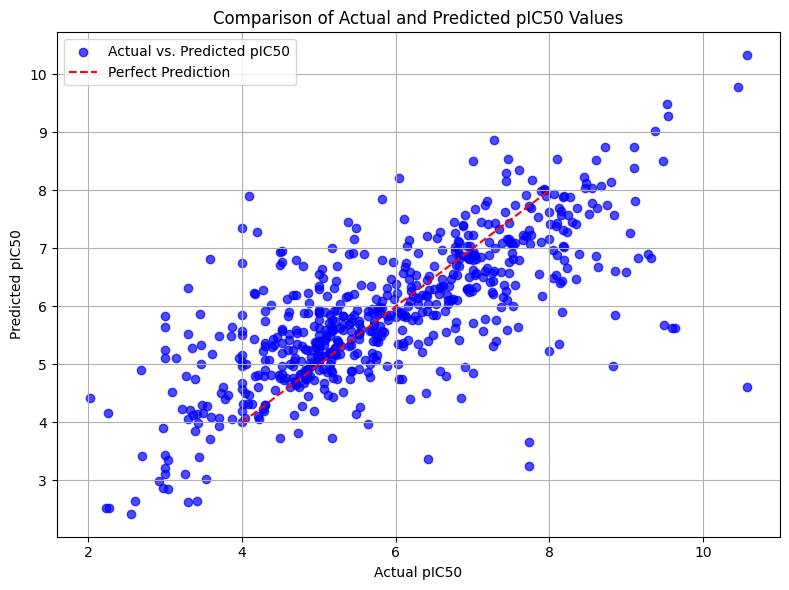

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred_test, color='blue', alpha=0.7, label='Actual vs. Predicted pIC50')

# Add a diagonal line for perfect prediction
plt.plot([4, 8], [4, 8], color='red', linestyle='--', label='Perfect Prediction')

# Set labels and title
plt.xlabel('Actual pIC50')
plt.ylabel('Predicted pIC50')
plt.title('Comparison of Actual and Predicted pIC50 Values')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.savefig("test_pred_v1")
plt.show()

#### Using for loop to do each fold

In [ ]:
# # another approach
# from sklearn.preprocessing import StandardScaler

# # initialize model
# svr = SVR()

# # build pipeline

# svr_param = {'kernel': ['rbf', 'linear'],
#              'C': [1, 10, 100]
#             }

# # innner cv for grid search/tune params
# inner_cv = KFold(n_splits=3, shuffle=True, random_state=1)
# gcv = GridSearchCV(svr, svr_param, scoring="neg_mean_absolute_error", n_jobs=-1, cv=inner_cv, verbose=0, refit=True)

# # outer cv for retraining with optimal params
# outer_scores = []
# outer_cv = KFold(n_splits=5, shuffle=True, random_state=1)

# # convert x_train, y_train to arr
# X_train_arr = np.array(X_train)
# y_train_arr = np.array(y_train)

# # loop through the fold
# for train_idx, valid_idx in outer_cv.split(X_train_arr, y_train_arr):
#   gcv.fit(X_train_arr[train_idx], y_train_arr[train_idx])
#   # print('\n Best MAE (avg of inner test fold) %.2f%%' % gcv.best_score_ * 100)
#   print('Best param', gcv.best_params_)

#   outer_scores.append(gcv.best_estimator_.score(X_train_arr[valid_idx], y_train_arr[valid_idx]))
#   print("MAE (on outer test fold) %.2f%%" % (outer_scores[-1] * 100)) # get recently appended score * 100

# print('\n outerloop:')

# print('MAE %.2f%% +/- %.2f' % np.mean(outer_scores) * 100, np.std(outer_scores) * 100)
# print(np.mean(outer_scores), np.std(outer_scores))

##---------------------------------------##


In [ ]:
# kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# # base line for RF
# rf = RandomForestRegressor()
# rf_score = cross_val_score(rf, X_train, y_train, cv=kfold, scoring='neg_mean_absolute_error')
# print('Random Forest 5-fold mean MAE is ', -np.mean(rf_score))

#### Evaluate on test set

In [ ]:
# final_model = RandomForestRegressor(n_estimators=1200, max_features='sqrt',
#                                     max_depth=100, bootstrap=True)

# final_model.fit(X_train, y_train)
# y_pred = final_model.predict(X_test)
# final_mae = mean_absolute_error(y_test, y_pred)

# print("MAE on test set: ", final_mae)

#### Plot MAE

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Create a scatter plot
# plt.figure(figsize=(8, 6))
# plt.scatter(y_test, y_pred, color='blue', alpha=0.7, label='Actual vs. Predicted pIC50')

# # Add a diagonal line for perfect prediction
# plt.plot([4, 8], [4, 8], color='red', linestyle='--', label='Perfect Prediction')

# # Set labels and title
# plt.xlabel('Actual pIC50')
# plt.ylabel('Predicted pIC50')
# plt.title('Comparison of Actual and Predicted pIC50 Values')

# # Add legend
# plt.legend()

# # Show the plot
# plt.grid(True)
# plt.tight_layout()
# plt.savefig("test_pred")
# plt.show()

# Part 2: RNN

## Concatenate generated SMILES to 1 dataframe

In [ ]:
g1 = pd.read_csv("chembl24_generated.csv", header=None)
g2 = pd.read_csv("chembl24_generated_19ep.csv",  header=None)

g1_series = g1.iloc[:,0]
g2_series = g2.iloc[:,0]

In [ ]:
print(g1_series)
print(g2_series)

0     NP
1     Cl
2      P
3      B
4      N
5      C
6     CC
7     OO
8    C=N
9      O
Name: 0, dtype: object
0    C
Name: 0, dtype: object


#### How to know if generated SMILES strings are valid? ?????

In [ ]:
# ??????????

#### Since we only consider canonical generated ones but g2_series has `C` which also exists in g1_series, we gonna use g1 to calculate the fingerprints

#### To calculate the fingerprints, we need to have the ChemBLID for the generated strings

In [ ]:
activity_2 = new_client.activity
# activity_2


### loop through the series

# 0 (no bio)

In [ ]:
p2_canon_g0 = activity_2.filter(canonical_smiles=g1_series[0])
df_g0 = pd.DataFrame.from_dict(p2_canon_g0)
df_g0.head()

""


# 1st (yes bio yes string)

In [ ]:
p2_canon_g1 = activity_2.filter(canonical_smiles=g1_series[1])
df_g1 = pd.DataFrame.from_dict(p2_canon_g1)
print(g1_series[1])
df_g1

Cl


,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,1443063,[],CHEMBL828816,Inhibitory constant against carbonic anhydrase I,B,None,None,BAO_0000192,...,Homo sapiens,Carbonic anhydrase I,9606,None,None,Ki,mM,UO_0000065,None,6.0
1,None,None,1443064,[],CHEMBL875204,Inhibitory constant against carbonic anhydrase II,B,None,None,BAO_0000192,...,Homo sapiens,Carbonic anhydrase II,9606,None,None,Ki,mM,UO_0000065,None,200.0
2,None,None,1443065,[],CHEMBL828825,Inhibitory constant against carbonic anhydrase IV,B,None,None,BAO_0000192,...,Homo sapiens,Carbonic anhydrase IV,9606,None,None,Ki,mM,UO_0000065,None,36.0
3,None,None,1443066,[],CHEMBL876781,Inhibitory constant against Zn-Cam (Methanosar...,F,None,None,BAO_0000192,...,Methanosarcina thermophila,Carbonic anhydrase,2210,None,None,Ki,mM,UO_0000065,None,200.0
4,None,None,1443177,[],CHEMBL830229,Inhibitory constant against methanoarchaeon Me...,B,None,None,BAO_0000192,...,Methanobacterium thermoautotrophicum,Carbonic anhydrase,187420,None,None,Ki,mM,UO_0000065,None,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,None,None,16611235,[],CHEMBL3815892,Inhibition of human carbonic anhydrase 2 prein...,B,None,None,BAO_0000192,...,Homo sapiens,Carbonic anhydrase II,9606,None,None,Ki,mM,UO_0000065,None,200.0
57,None,None,16611271,[],CHEMBL3815891,Inhibition of human carbonic anhydrase 1 prein...,B,None,None,BAO_0000192,...,Homo sapiens,Carbonic anhydrase I,9606,None,None,Ki,mM,UO_0000065,None,6.0
58,None,None,16611293,[],CHEMBL3815900,Inhibition of Vibrio cholerae recombinant carb...,B,None,None,BAO_0000192,...,None,Unchecked,None,None,None,Ki,mM,UO_0000065,None,8.8
59,"{'action_type': 'SUBSTRATE', 'description': 'C...",Substrate. In Comparison To Wild-Type And Not-...,24930845,[],CHEMBL5209622,Substrate uptake by the thiazide-sensitive ele...,F,None,None,BAO_0000179,...,Homo sapiens,Thiazide-sensitive sodium-chloride cotransporter,9606,None,None,proof of principle,None,None,None,None


In [ ]:
print(df_g1.standard_value.unique())
print(df_g1.molecule_chembl_id.unique())
print(df_g1.target_chembl_id.unique())
print(df_g1.type.unique())

['6000000.0' '200000000.0' '36000000.0' '152000000.0' '156.0'
 '138000000.0' '90000.0' '156000000.0' '33000000.0' '1840000.0' '720000.0'
 '500000.0' '530000.0' None '56.2' '7.5' '4.75' '74.8' '1.8' '1.95'
 '100.0' '7.73' '3.54' '7.2' '8.21' '2700000.0' '850000.0' '8300000.0'
 '361000000.0' '930000.0' '8100000.0' '8800000.0']
['CHEMBL1231821']
['CHEMBL261' 'CHEMBL205' 'CHEMBL3729' 'CHEMBL3932' 'CHEMBL3926'
 'CHEMBL2111457' 'CHEMBL2186' 'CHEMBL3594' 'CHEMBL2326' 'CHEMBL3025'
 'CHEMBL1075028' 'CHEMBL1649055' 'CHEMBL613347' 'CHEMBL612545'
 'CHEMBL3621035' 'CHEMBL1876' 'CHEMBL4523359']
['Ki' 'Activity' 'proof of principle']


In [ ]:
# get chembl similar to target chembl
df_g1_filter = df_g1[(df_g1["target_organism"] == "Homo sapiens")]

# df_g1_filter.columns

df_g1_filter = df_g1_filter.dropna(subset=["standard_value"])

df_g1_filter_min = df_g1_filter.standard_value.min()

print(df_g1_filter_min)
print(df_g1_filter.standard_value.unique())

df_g1_filter = df_g1_filter[df_g1_filter["standard_value"] == df_g1_filter_min]
df_g1_filter

156.0
['6000000.0' '200000000.0' '36000000.0' '156.0' '90000.0' '156000000.0'
 '33000000.0' '1840000.0' '720000.0']


,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
7,None,None,1456307,[],CHEMBL839467,Inhibitory activity against human carbonic anh...,B,None,None,BAO_0000192,...,Homo sapiens,Carbonic anhydrase V,9606,None,None,Ki,nM,UO_0000065,None,156.0


# 2nd (yes bio, no homo)

In [ ]:
p2_canon_g2 = activity_2.filter(canonical_smiles=g1_series[2])
df_g2 = pd.DataFrame.from_dict(p2_canon_g2)
print(g1_series[2])
df_g2

In [ ]:
print(df_g2["type"].unique())

In [ ]:
# get chembl similar to target chembl
df_g2_filter = df_g2[(df_g2["target_organism"] == "Homo sapiens")]

df_g2_filter

# df_g1_filter = df_g1_filter.dropna(subset=["standard_value"])

# df_g1_filter_min = df_g1_filter.standard_value.min()

# print(df_g1_filter_min)
# df_g1_filter.standard_value.unique()

# 3rd (no bio)

In [ ]:
p2_canon_g3 = activity_2.filter(canonical_smiles=g1_series[3])
df_g3 = pd.DataFrame.from_dict(p2_canon_g3)
print(g1_series[3])
df_g3

# 4th (yes bio yes string)

In [ ]:
p2_canon_g4 = activity_2.filter(canonical_smiles=g1_series[4])
df_g4 = pd.DataFrame.from_dict(p2_canon_g4)
print(g1_series[4])
df_g4

N


,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,Not Determined,1286310,[],CHEMBL751863,Binding affinity at heteropentameric Nicotinic...,B,None,None,BAO_0000192,...,Homo sapiens,Neuronal acetylcholine receptor; alpha4/beta2,9606,None,None,Ki,nM,UO_0000065,None,None
1,None,Not Determined,1286311,[],CHEMBL751839,Binding affinity at homopentameric Nicotinic a...,B,None,None,BAO_0000192,...,Homo sapiens,Neuronal acetylcholine receptor protein alpha-...,9606,None,None,Ki,nM,UO_0000065,None,None
2,None,None,6330020,[],CHEMBL1821446,Activity of N-terminal His6-tagged Trypanosoma...,B,None,None,BAO_0000481,...,None,Unchecked,None,None,None,Kcat,/s,None,None,1.6
3,None,Active,6330021,[],CHEMBL1820632,Inhibition of N-terminal His6-tagged Trypanoso...,B,None,None,BAO_0000201,...,None,Unchecked,None,None,None,INH,None,UO_0000187,None,None
4,None,Active,6330022,[],CHEMBL1820633,Inhibition of N-terminal His6-tagged Trypanoso...,B,None,None,BAO_0000201,...,None,Unchecked,None,None,None,INH,None,UO_0000187,None,None
5,None,None,6330023,[],CHEMBL1820634,Activity of Escherichia coli CTPS assessed as ...,B,None,None,BAO_0000481,...,None,Unchecked,None,None,None,Kcat,/s,None,None,4.4
6,None,None,6330024,[],CHEMBL1820635,Ratio of Kcat for Escherichia coli CTPS to Kca...,B,None,None,BAO_0000193,...,None,Unchecked,None,None,None,Ratio,None,None,None,3.0
7,None,None,6330025,[],CHEMBL1820636,Ratio of Kcat to Km for N-terminal His6-tagged...,B,None,None,BAO_0000179,...,None,Unchecked,None,None,None,Kcat/Km,/M/s,None,None,727.0
8,None,None,6330026,[],CHEMBL1820637,Ratio of Kcat to Km for Escherichia coli CTPS ...,B,None,None,BAO_0000179,...,None,Unchecked,None,None,None,Kcat/Km,10'3/M/s,None,None,4.0
9,None,None,6330037,[],CHEMBL1821446,Activity of N-terminal His6-tagged Trypanosoma...,B,None,None,BAO_0000179,...,None,Unchecked,None,None,None,Ks,mM,UO_0000063,None,2.2


In [ ]:
df_g4["type"].unique()

array(['Ki', 'Kcat', 'INH', 'Ratio', 'Kcat/Km', 'Ks', 'pKa', 'Activity'],
      dtype=object)

In [ ]:
df_g4_filter = df_g4[(df_g4["target_organism"] == "Homo sapiens") &
                     (df_g4["type"] == "Ki") &
                     (df_g4["target_chembl_id"] == "CHEMBL1907589")]

df_g4_filter
# df_g4_filter = df_g4_filter.dropna(subset=["standard_value"])

# df_g4_filter_min = df_g4_filter.standard_value.min()

# print(df_g4_filter_min)
# # df_g4_filter.standard_value.unique()

# df_g4_filter = df_g4_filter[df_g4_filter["standard_value"] == df_g4_filter_min]
# df_g4_filter

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,Not Determined,1286310,[],CHEMBL751863,Binding affinity at heteropentameric Nicotinic...,B,None,None,BAO_0000192,...,Homo sapiens,Neuronal acetylcholine receptor; alpha4/beta2,9606,None,None,Ki,nM,UO_0000065,None,None


# 5th (yes bio no human)

In [ ]:
p2_canon_g5 = activity_2.filter(canonical_smiles=g1_series[5])
df_g5 = pd.DataFrame.from_dict(p2_canon_g5)
print(g1_series[5])
df_g5

In [ ]:
df_g5_filter = df_g5[(df_g5["target_organism"] == "Homo sapiens")]

df_g5_filter

# df_g4_filter = df_g4_filter.dropna(subset=["standard_value"])

# df_g4_filter_min = df_g4_filter.standard_value.min()

# print(df_g4_filter_min)
# # df_g4_filter.standard_value.unique()

# df_g4_filter = df_g4_filter[df_g4_filter["standard_value"] == df_g4_filter_min]
# df_g4_filter

# 6th (yes bio no human)

In [ ]:
p2_canon_g6 = activity_2.filter(canonical_smiles=g1_series[6])
df_g6 = pd.DataFrame.from_dict(p2_canon_g6)
print(g1_series[6])
df_g6

In [ ]:
df_g6_filter = df_g6[(df_g6["target_organism"] == "Homo sapiens")]

df_g6_filter

# 7th (yes bio yes string)

In [ ]:
p2_canon_g7 = activity_2.filter(canonical_smiles=g1_series[7])
df_g7 = pd.DataFrame.from_dict(p2_canon_g7)
print(g1_series[7])
df_g7

OO


,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,Active,361862,[],CHEMBL766000,Inhibitory activity against Protein-tyrosine p...,B,None,None,BAO_0000375,...,Homo sapiens,Leukocyte common antigen,9606,None,None,Activity,None,None,None,None
1,None,None,424120,[],CHEMBL822651,Inhibition of protein tyrosine phosphatase (PT...,B,None,None,BAO_0000201,...,None,Unchecked,None,None,None,Inhibition,%,UO_0000187,None,65.0
2,None,None,424121,[],CHEMBL822650,Inhibition of protein tyrosine phosphatase (PT...,B,None,None,BAO_0000201,...,None,Unchecked,None,None,None,Inhibition,%,UO_0000187,None,0.0
3,None,None,3568417,[],CHEMBL1278753,Antimicrobial activity against Streptococcus m...,F,None,None,BAO_0000179,...,Streptococcus mutans,Streptococcus mutans,1309,None,None,FC,None,None,None,1.5
4,None,None,3568418,[],CHEMBL1279017,Antimicrobial activity against Streptococcus m...,F,None,None,BAO_0000179,...,Streptococcus mutans,Streptococcus mutans,1309,None,None,FC,None,None,None,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,None,Active,22769969,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4704216,Induction of ROS generation in Leishmania dono...,F,None,None,BAO_0000375,...,Leishmania donovani,Leishmania donovani,5661,None,None,Activity,None,None,None,None
95,None,Not Active,22891435,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4729535,Down regulation of LRPPRC expression in human ...,F,None,None,BAO_0000375,...,None,Unchecked,None,None,None,Activity,None,None,None,None
96,None,Not Active,22891436,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4729536,Down regulation of PNPT1 expression in human M...,F,None,None,BAO_0000375,...,None,Unchecked,None,None,None,Activity,None,None,None,None
97,None,Active,22976031,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4771766,Cell cycle arrest in human CCRF-CEM cells asse...,F,None,None,BAO_0000375,...,Homo sapiens,CCRF-CEM,9606,None,None,Activity,None,None,None,None


In [ ]:
df_g7["type"].unique()

array(['Activity', 'Inhibition', 'FC', 'CFU', 'IC50', 'MIC',
       'Flu intensity', 'INH', 'Cp'], dtype=object)

In [ ]:
df_g7_filter = df_g7[(df_g7["target_organism"] == "Homo sapiens") &
                     (df_g7["type"] == "IC50")]

df_g7_filter

# df_g7_filter = df_g7_filter.dropna(subset=["standard_value"])

# df_g7_filter_min = df_g7_filter.standard_value.min()

# print(df_g7_filter_min)
# # df_g4_filter.standard_value.unique()

# df_g7_filter = df_g7_filter[df_g7_filter["standard_value"] == df_g7_filter_min]
# df_g7_filter

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
49,None,None,16479632,[],CHEMBL3768680,Cytotoxicity against human NCI-H1299 cells ass...,F,None,None,BAO_0000190,...,Homo sapiens,NCI-H1299,9606,None,None,IC50,uM,UO_0000065,None,60.0


# 8th (no bio)

In [ ]:
p2_canon_g8 = activity_2.filter(canonical_smiles=g1_series[8])
df_g8 = pd.DataFrame.from_dict(p2_canon_g8)
print(g1_series[8])
df_g8

# 9th (yes bio no homo)

In [ ]:
p2_canon_g9 = activity_2.filter(canonical_smiles=g1_series[9])
df_g9 = pd.DataFrame.from_dict(p2_canon_g9)
print(g1_series[9])
df_g9

In [ ]:
df_g9_filter = df_g9[(df_g9["target_organism"] == "Homo sapiens")]

df_g9_filter

# Concatenate

In [ ]:
frames = [df_g1_filter, df_g4_filter, df_g7_filter]

p2_df = pd.concat(frames, axis=0)
p2_df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
7,None,None,1456307,[],CHEMBL839467,Inhibitory activity against human carbonic anh...,B,None,None,BAO_0000192,...,Homo sapiens,Carbonic anhydrase V,9606,None,None,Ki,nM,UO_0000065,None,156.0
0,None,Not Determined,1286310,[],CHEMBL751863,Binding affinity at heteropentameric Nicotinic...,B,None,None,BAO_0000192,...,Homo sapiens,Neuronal acetylcholine receptor; alpha4/beta2,9606,None,None,Ki,nM,UO_0000065,None,None
49,None,None,16479632,[],CHEMBL3768680,Cytotoxicity against human NCI-H1299 cells ass...,F,None,None,BAO_0000190,...,Homo sapiens,NCI-H1299,9606,None,None,IC50,uM,UO_0000065,None,60.0


In [ ]:
p2_df["molecule_chembl_id"]

7     CHEMBL1231821
0     CHEMBL1160819
49      CHEMBL71595
Name: molecule_chembl_id, dtype: object

# Evaluate druglikeness using Lipinski
*  find which one falls into the listed conditions
* Lipinski's Rule stated the following:
    * Molecular weight < 500 Dalton
    * Octanol-water partition coefficient (LogP) < 5
    * Hydrogen bond donors < 5
    * Hydrogen bond acceptors < 10
* pIC50 > 6 = Actives and pIC50 < 5 = Inactives (mental note)

In [ ]:
df2_lipinski = lipinski(p2_df.canonical_smiles)
df2_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,36.461,0.4218,0.0,0.0
1,17.031,0.1620,1.0,1.0
2,34.014,0.0174,2.0,2.0


# Calculate P2 fingerprint

In [ ]:
selection2 = ['canonical_smiles','molecule_chembl_id']
p2_df_selection = p2_df[selection2]
p2_df_selection.to_csv('molecule2.smi', sep='\t', index=False, header=False)

In [ ]:
! cat molecule2.smi

Cl	CHEMBL1231821
N	CHEMBL1160819
OO	CHEMBL71595


In [ ]:
! cat molecule2.smi | wc -l

3


In [ ]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [ ]:
! bash padel.sh

Processing CHEMBL1160819 in molecule2.smi (2/3127). 
Processing CHEMBL1231821 in molecule2.smi (1/3127). 
Processing CHEMBL133897 in molecule.smi (4/3127). Average speed: 3.86 s/mol.
Processing CHEMBL71595 in molecule2.smi (3/3127). Average speed: 3.85 s/mol.
Processing CHEMBL336398 in molecule.smi (5/3127). Average speed: 1.34 s/mol.
Processing CHEMBL131588 in molecule.smi (6/3127). Average speed: 1.22 s/mol.
Processing CHEMBL130628 in molecule.smi (7/3127). Average speed: 1.03 s/mol.
Processing CHEMBL130478 in molecule.smi (8/3127). Average speed: 1.03 s/mol.
Processing CHEMBL130098 in molecule.smi (9/3127). Average speed: 0.89 s/mol.
Processing CHEMBL337486 in molecule.smi (10/3127). Average speed: 0.86 s/mol.
Processing CHEMBL336538 in molecule.smi (11/3127). Average speed: 0.80 s/mol.
Processing CHEMBL131051 in molecule.smi (12/3127). Average speed: 0.81 s/mol.
Processing CHEMBL341437 in molecule.smi (13/3127). Average speed: 0.78 s/mol.
Processing CHEMBL335033 in molecule.smi (14

## Use trained RF to predict generated SMILES strings

In [ ]:
p2_df_finger = pd.read_csv('descriptors_output.csv')

In [ ]:
p2_df_finger.head()

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL1160819,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL1231821,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL71595,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL133897,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL336398,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
t1 = p2_df_finger[p2_df_finger["Name"] == "CHEMBL1160819"]
t2 = p2_df_finger[p2_df_finger["Name"] == "CHEMBL1231821"]
t3 = p2_df_finger[p2_df_finger["Name"] == "CHEMBL71595"]

# pd.concat(frames, axis=0)
t_concat = pd.concat([t1, t2, t3], axis=0)
t_concat

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL1160819,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL1231821,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL71595,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
t_concat_X = t_concat.drop("Name", axis=1)
t_concat_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
t_concat_X.shape

(3, 881)

# remove low variance

In [ ]:
# from sklearn.feature_selection import VarianceThreshold
# selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
# p2_df_finger_X = selection.fit_transform(p2_df_finger_X)

In [ ]:
# p2_df_finger_X.shape

### Predict IC50

In [ ]:
df_final.pIC50.describe()

count    4163.000000
mean        5.825960
std         1.540972
min         1.304518
25%         4.744005
50%         5.667562
75%         6.920819
max        11.221849
Name: pIC50, dtype: float64

In [ ]:
p2_pred = rf_select.predict(t_concat_X)
p2_pred

array([4.14181289, 4.22082546, 5.0399713 ])